Vorbereitung:

In [1]:
from lgca import get_lgca
from lgca.helpers import *
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import time
import pandas as pd

   
saving_plots = False


Daten einlesen:

In [2]:
# propst = np.load('saved_data/schauen/' + '18060_1props_t id=' +'.npy')
# props = np.load('saved_data/' + '18090_1_props_t' +'.npy')

name = 'c352d2f'
file = '1802'
look = 5500
li = 1000
ids = []
offs0 =  np.load('saved_data/'+ name +'/' + file + '_0_' + name + '_offsprings' +'.npy')
offs1 =  np.load('saved_data/'+ name +'/' + file + '_1_' + name + '_offsprings' +'.npy')
offs2 =  np.load('saved_data/'+ name +'/' + file + '_2_' + name + '_offsprings' +'.npy')
offs3 =  np.load('saved_data/'+ name +'/' + file + '_3_' + name + '_offsprings' +'.npy')
offs4 =  np.load('saved_data/'+ name +'/' + file + '_4_' + name + '_offsprings' +'.npy')
offs5 =  np.load('saved_data/'+ name +'/' + file + '_5_' + name + '_offsprings' +'.npy')
offs6 =  np.load('saved_data/'+ name +'/' + file + '_6_' + name + '_offsprings' +'.npy')
offs7 =  np.load('saved_data/'+ name +'/' + file + '_7_' + name + '_offsprings' +'.npy')
offs8 =  np.load('saved_data/'+ name +'/' + file + '_8_' + name + '_offsprings' +'.npy')
offs9 =  np.load('saved_data/'+ name +'/' + file + '_9_' + name + '_offsprings' +'.npy')
offs = [offs0, offs1, offs2, offs3, offs4, offs5, offs6, offs7, offs8, offs9]

tend = [len(offs0), len(offs1), len(offs2), len(offs3), len(offs4), len(offs5), len(offs6), len(offs7), len(offs8), len(offs9)]
for i in range(len(tend)):
    print('Zeitschritte bis Homogenität ', tend[i]-1)
    if tend[i]-1 >= look-li/2 and tend[i]-1 <= look+li/2:
        print('nehmen Durchlauf: ', i)
        ids.append(i)

# maxlab = len(offs0[0])-1
# print('maxlab ist ', maxlab)
print(ids)
ids = [5]
# print(offs[1])

Zeitschritte bis Homogenität  8759
Zeitschritte bis Homogenität  6368
Zeitschritte bis Homogenität  4171
Zeitschritte bis Homogenität  24399
Zeitschritte bis Homogenität  9757
Zeitschritte bis Homogenität  5774
nehmen Durchlauf:  5
Zeitschritte bis Homogenität  5461
nehmen Durchlauf:  6
Zeitschritte bis Homogenität  4187
Zeitschritte bis Homogenität  15668
Zeitschritte bis Homogenität  8803
[5, 6]


Entropien vergleichen:

In [3]:
# %matplotlib notebook
# for entry in ids:
#     plot_sh_gi_hh(offs[entry], id=entry, save=saving_plots, off=True)


Entwicklung Populationsgröße:

In [4]:
# %matplotlib notebook
# plot_popsize(off_data, save=saving_plots, off=True)

Mullerplot erstellen:

<IPython.core.display.Javascript object>


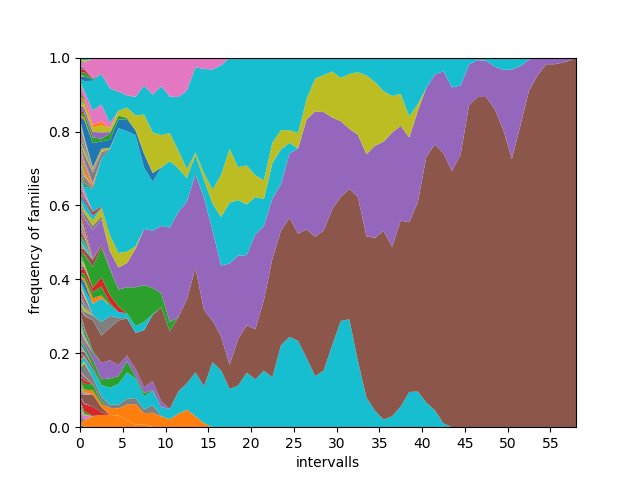

In [9]:
%matplotlib notebook
for entry in ids:
    mullerplot_extended(offs[entry], int_range=100, zusatz=True, off=True, save=saving_plots, id=entry)

In [6]:
# %matplotlib notebook
# mullerplot_extended(off_data2, off=True)

In [7]:
# entropies(off_data2, order=1, plot=True, save_plot=False, id=0, off=True)

In [8]:
# entropies(off_data2, order=2, plot=True, save_plot=False, id=0, off=True)